# 🏦 Loan defaulters prediction using machine learning

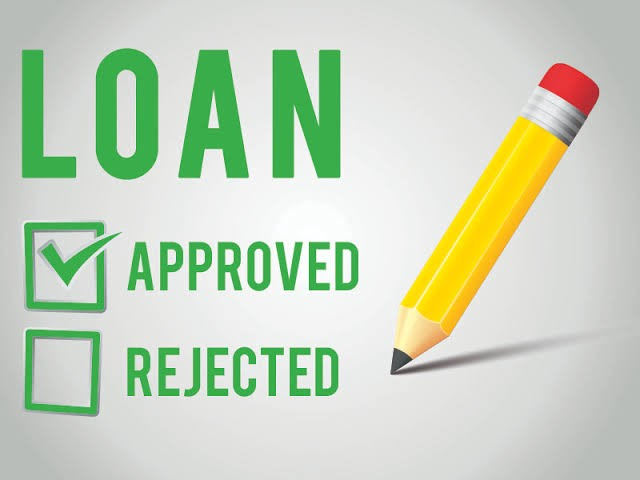

<h2> Introduction</h2>

> There are many Banks and Financial institutions, which provide loan to urban customers. To grant the loan amount, bank has to thoroughly review customer’s application considering different attributes of applicant. This process is known as Credit risk analysis. It is very critical for every bank and financial institution as it helps them to manage financial risk. Mainly, there are two types of risks associated with bank’s decision:

>-	Not approving loan application of a person likely to pay the amount, leads to Business loss for Bank.
>-	Approving loan application of a person not likely to pay the amount, leads to financial loss to the Bank.

> Now, analysis of application of each customer can be difficult as well as time consuming. So, to mitigate the risks and to solve problems, data of past applicants can be used. Here, the main aim is to identify the patterns in data by leveraging exploratory data analysis and Machine learning. It is very helpful for making various actions such as accepting loan application, to reduce amount to be disbursed, to increase or decrease interest rate, duration of loan, etc.
Generally, there are two types of decisions made by bank or financial institution.

> 1. Loan application accepted: If application is approved, there can be three scenarios:
	- Fully paid: Applicant has fully paid the loan.
    - Current: Applicant is currently paying the installments of loan. They are not considered defaulters.
    - Charged-Off: Applicant has not paid the installments in due time. They are considered defaulters.

> 2. Loan rejected: It is rejected, as they don’t have sufficient data or not matching requirements.

> <B>The aim of the project is to leverage machine learning techniques to build a robust module to predict loan defaulters based on different features.</B>


<h2>Challenges</h2>

> Here are some of the following challenges that are identified in the project:

> - To acquire financial data can be a tough task. However, nowadays a lot of open-source platforms provide such data.
> - Identification of relevant and strong indicators of defaulters.
> - Understanding of domain knowledge is at most important to solve the problem. So, research of credit analytics needs to be done.
> - One of the challenges will be to deal with imbalanced data set, as there will be less proportion of defaulters and high proportion of non -defaulters.
> - To identify pertinent measures to evaluate performance of machine learning models for imbalanced data set.

> Later on, each challenge will addressed in the project. 

<h2> Data Description</h2>

> Data set used in the project is of Lending club and downloaded from Kaggle website. Lending club is the largest online loan marketplace, which facilitates business loan, personal loan, auto loan and finances for medical purposes. It is headquartered in San Francisco, California and was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market.

> <B>Information on 27 different attributes of applicants:</B>

> 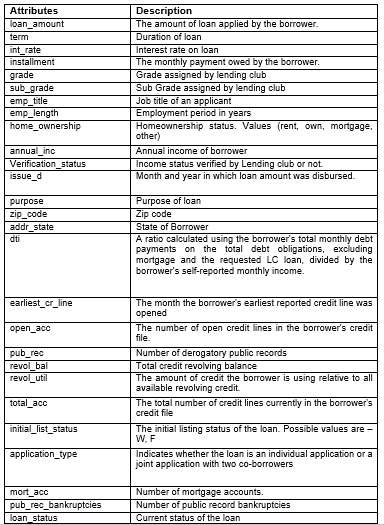

<h2>Procedure</h2>

> Proposed solution to solve the problem involves exploratory data analysis to identify key predictors and machine learning models to automate the process of defaulter prediction. Following is flow of the project with proposed methodologies to be used in project:

> 1. Exploratory data analysis
	- Numerical summary and visualization plots (Box plot, scatter plot)
 
> 2. Data preparation
    - Synthetic data points in minority class
    - Class weights

> 3. Feature selection/dimensionality reduction
    - Statistical based feature selection (Anova, chi-squared, etc)

> 4. Classification modelling
    - Logistic Regression
	- SVM
	- Decision Tree
    - Naïve Bayes
    - Boosting techniques
    - Neural net

> 5. Model selection
    - Hyper parameter tuning
    - Cross Validation

> 6. Model evaluation
    - Precision, Recall, F1-Score, precision vs recall curve


<h3>Import Libraries</h3>

In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report, 
    roc_auc_score, roc_curve, auc,recall_score,precision_score,f1_score,
    plot_confusion_matrix, plot_roc_curve
)
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import StratifiedKFold

<h3>Import Data</h3>

In [2]:
Data = pd.read_csv('lending_club_loan_two.csv')

<h3>Display Data</h3>

In [51]:
Data

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60 months,10.99,217.38,B,B4,licensed bankere,2 years,RENT,40000.0,...,6.0,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\r\nJohnnyville, DC 30723"
396026,21000.0,36 months,12.29,700.42,C,C1,Agent,5 years,MORTGAGE,110000.0,...,6.0,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\r\nRachelborough, ..."
396027,5000.0,36 months,9.99,161.32,B,B1,City Carrier,10+ years,RENT,56500.0,...,15.0,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\r\nReedfort, NY 7..."
396028,21000.0,60 months,15.31,503.02,C,C2,"Gracon Services, Inc",10+ years,MORTGAGE,64000.0,...,9.0,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\r\nNew Michael, FL..."


# Exploratory Data Analysis

<h3>Data Types</h3>

In [52]:
Data.dtypes

loan_amnt               float64
term                     object
int_rate                float64
installment             float64
grade                    object
sub_grade                object
emp_title                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
title                    object
dti                     float64
earliest_cr_line         object
open_acc                float64
pub_rec                 float64
revol_bal               float64
revol_util              float64
total_acc               float64
initial_list_status      object
application_type         object
mort_acc                float64
pub_rec_bankruptcies    float64
address                  object
dtype: object

<h3>Descriptive Statistics (Shape of the data)</h3>

In [53]:
Data.shape

(396030, 27)

Dataset has 396030 customers (observations) and 27 attributes (features).

<h3>Descriptive Statistics (Measure of central tendency and dispersion)</h3>

In [54]:
round(Data.describe(),1)

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.0,396030.0,396030.0,396030.0,396030.0,396030.0,396030.0,396030.0,395754.0,396030.0,358235.0,395495.0
mean,14113.9,13.6,431.8,74203.2,17.4,11.3,0.2,15844.5,53.8,25.4,1.8,0.1
std,8357.4,4.5,250.7,61637.6,18.0,5.1,0.5,20591.8,24.5,11.9,2.1,0.4
min,500.0,5.3,16.1,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
25%,8000.0,10.5,250.3,45000.0,11.3,8.0,0.0,6025.0,35.8,17.0,0.0,0.0
50%,12000.0,13.3,375.4,64000.0,16.9,10.0,0.0,11181.0,54.8,24.0,1.0,0.0
75%,20000.0,16.5,567.3,90000.0,23.0,14.0,0.0,19620.0,72.9,32.0,3.0,0.0
max,40000.0,31.0,1533.8,8706582.0,9999.0,90.0,86.0,1743266.0,892.3,151.0,34.0,8.0


- Average loan amount of customers is $ 14113
- Average interest rate is 13.6
- Average debt to income ratio is 17.4 % (Ideal % should not be greater than 28 % pre tax  )
- Average revolving utilization (debt to limit ratio) percentage is 25 % (Lower the revolving utilization, better it is)


In [56]:
Data.describe(include='object')

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,title,earliest_cr_line,initial_list_status,application_type,address
count,396030,396030,396030,373103,377729,396030,396030,396030,396030,396030,394275,396030,396030,396030,396030
unique,2,7,35,173105,11,6,3,115,2,14,48817,684,2,3,393700
top,36 months,B,B3,Teacher,10+ years,MORTGAGE,Verified,Oct-2014,Fully Paid,debt_consolidation,Debt consolidation,Oct-2000,f,INDIVIDUAL,USS Smith\r\nFPO AP 70466
freq,302005,116018,26655,4389,126041,198348,139563,14846,318357,234507,152472,3017,238066,395319,8


- Above gives the brief descriptive statistics of categorical feature

<h3>Unique values in each feature</h3>

In [25]:
for feature in list(Data.columns):
    print("{} has {} unique values".format(feature,Data[feature].nunique()))
    print(Data[feature].unique())
    print(" ")

loan_amnt has 1397 unique values
[10000.  8000. 15600. ... 36275. 36475.   725.]
 
term has 2 unique values
[' 36 months' ' 60 months']
 
int_rate has 566 unique values
[11.44 11.99 10.49  6.49 17.27 13.33  5.32 11.14 10.99 16.29 13.11 14.64
  9.17 12.29  6.62  8.39 21.98  7.9   6.97  6.99 15.61 11.36 13.35 12.12
  9.99  8.19 18.75  6.03 14.99 16.78 13.67 13.98 16.99 19.91 17.86 21.49
 12.99 18.54  7.89 17.1  18.25 11.67  6.24  8.18 12.35 14.16 17.56 18.55
 22.15 10.39 15.99 16.07 24.99  9.67 19.19 21.   12.69 10.74  6.68 19.22
 11.49 16.55 19.97 24.7  13.49 18.24 16.49 25.78 25.83 18.64  7.51 13.99
 15.22 15.31  7.69 19.53 10.16  7.62  9.75 13.68 15.88 14.65  6.92 23.83
 10.75 18.49 20.31 17.57 27.31 19.99 22.99 12.59 10.37 14.33 13.53 22.45
 24.5  17.99  9.16 12.49 11.55 17.76 28.99 23.1  20.49 22.7  10.15  6.89
 19.52  8.9  14.3   9.49 25.99 24.08 13.05 14.98 16.59 11.26 25.89 14.48
 21.99 23.99  5.99 14.47 11.53  8.67  8.59 10.64 23.28 25.44  9.71 16.2
 19.24 24.11 15.8  15.96 14.4

open_acc has 61 unique values
[16. 17. 13.  6.  8. 11.  5. 30.  9. 15. 12. 10. 18.  7.  4. 14. 20. 19.
 21. 23.  3. 26. 42. 22. 25. 28.  2. 34. 24. 27. 31. 32. 33.  1. 29. 36.
 40. 35. 37. 41. 44. 39. 49. 48. 38. 51. 50. 43. 46.  0. 47. 57. 53. 58.
 52. 54. 45. 90. 56. 55. 76.]
 
pub_rec has 20 unique values
[ 0.  1.  2.  3.  4.  6.  5.  8.  9. 10. 11.  7. 19. 13. 40. 17. 86. 12.
 24. 15.]
 
revol_bal has 55622 unique values
[ 36369.  20131.  11987. ...  34531. 151912.  29244.]
 
revol_util has 1226 unique values
[ 41.8   53.3   92.2  ...  56.26 111.4  128.1 ]
 
total_acc has 118 unique values
[ 25.  27.  26.  13.  43.  23.  15.  40.  37.  61.  35.  22.  20.  36.
  38.   7.  18.  10.  17.  29.  16.  21.  34.   9.  14.  59.  41.  19.
  12.  30.  56.  24.  28.   8.  52.  31.  44.  39.  50.  11.  62.  32.
   5.  33.  46.  42.   6.  49.  45.  57.  48.  67.  47.  51.  58.   3.
  55.  63.  53.   4.  71.  69.  54.  64.  81.  72.  60.  68.  65.  73.
  78.  84.   2.  76.  75.  79.  87.  77. 104

- Above gives unique number of values in each feature.

<h2>Visualization</h2>

To get better understanding of each feature, lets explore data with visualization

<h3>Loan Status</h3>

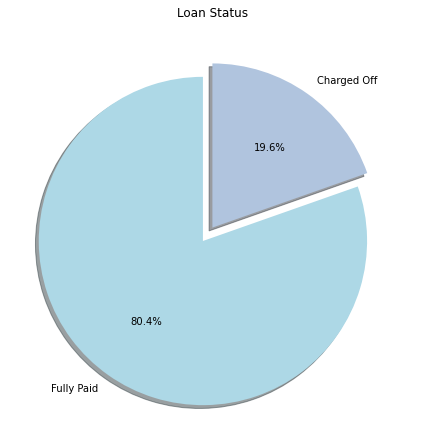

In [61]:
labels, values = zip(*Counter(Data["loan_status"]).items())
colors = ['lightblue', 'lightsteelblue']
piechart_df = (pd.DataFrame(list(values),list(labels)))
piechart_df = piechart_df.reset_index()
fig = plt.figure(figsize=[6, 6])
plt.pie(piechart_df[0],labels=piechart_df["index"],startangle=90,explode=(0.1,0),autopct="%1.1f%%", shadow=True, colors=colors)
plt.tight_layout()
plt.title("Loan Status")
plt.show()

As we can see, <b>80.4%</b> of the customers have fully paid the loan in time, whereas <b>19.6%</b> of the customers have not fully paid the loan.

<h3>Grade</h3>

<AxesSubplot:xlabel='grade', ylabel='count'>

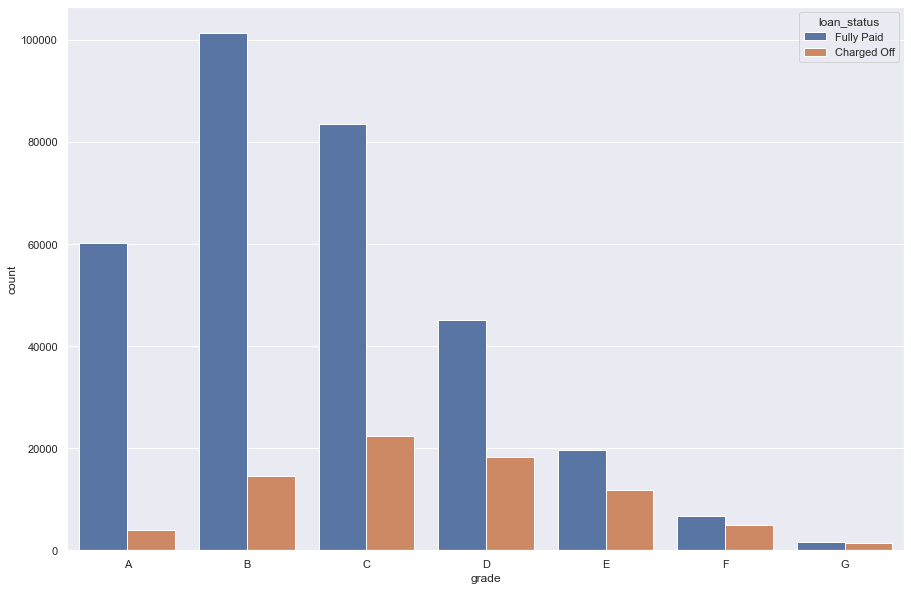

In [70]:
plt.figure(figsize=(15, 10))
grade = sorted(Data.grade.unique().tolist())
sns.set_theme(style="darkgrid")
sns.countplot(x='grade', data=Data, hue='loan_status', order=grade)

<h3>Sub Grade</h3>

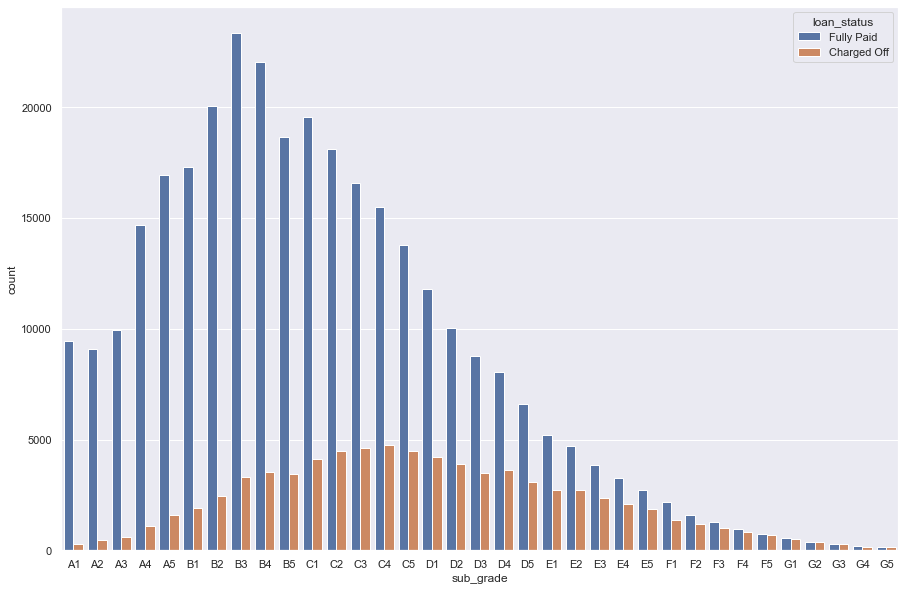

In [72]:
plt.figure(figsize=(15, 10))
sub_grade = sorted(Data.sub_grade.unique().tolist())
g = sns.countplot(x='sub_grade', data=Data, hue='loan_status', order=sub_grade)

- Grade <b>F</b> and <b>G</b> have more charged off to fully paid ratio. Lets prepare a seperate countplots for them.
- Other grades have high number of customers who fully paid.

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

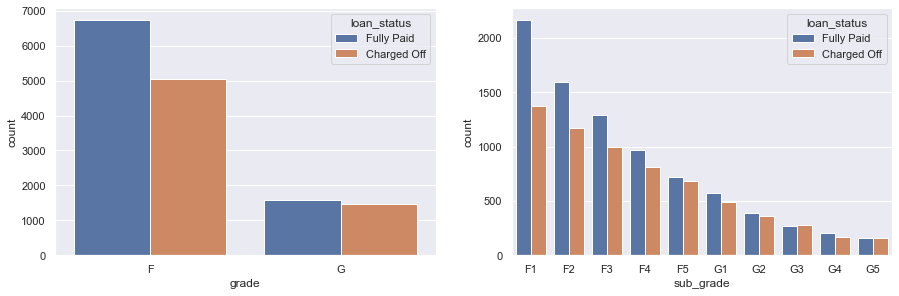

In [73]:
# Dataframe with grade F and G
df = Data[(Data.grade == 'F') | (Data.grade == 'G')]

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
grade = sorted(df.grade.unique().tolist())
sns.countplot(x='grade', data=df, hue='loan_status', order=grade)

plt.subplot(2, 2, 2)
sub_grade = sorted(df.sub_grade.unique().tolist())
sns.countplot(x='sub_grade', data=df, hue='loan_status', order=sub_grade)

- Sub Grade <b>F1 to F5 and G1 to G5</b> have high charged off to fully paid ratio. This grades might play convincing part in classification.


<h3>Term</h3>

In [85]:
# Number of customers in each Term
Data['term'].value_counts()

 36 months    302005
 60 months     94025
Name: term, dtype: int64

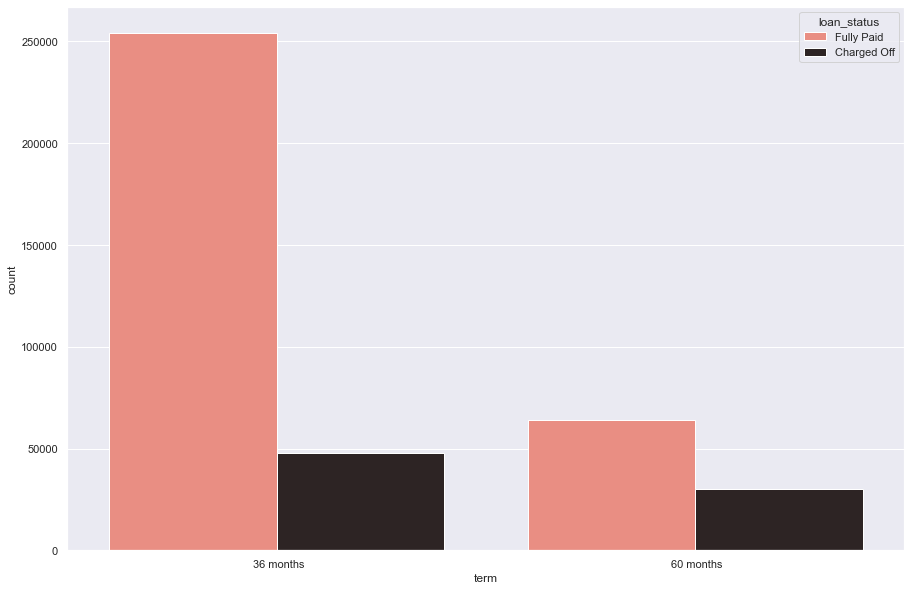

In [84]:
plt.figure(figsize=(15, 10))
term = sorted(Data.term.unique().tolist())
g = sns.countplot(x='term', data=Data, hue='loan_status', order=term,palette='dark:salmon_r')

- More number of customers have loan for <b>36 months</b> term loan compared to <b>60 months</b> term.

<h3>Purpose</h3>

In [86]:
# Number of customers for each purpose
Data['purpose'].value_counts()

debt_consolidation    234507
credit_card            83019
home_improvement       24030
other                  21185
major_purchase          8790
small_business          5701
car                     4697
medical                 4196
moving                  2854
vacation                2452
house                   2201
wedding                 1812
renewable_energy         329
educational              257
Name: purpose, dtype: int64

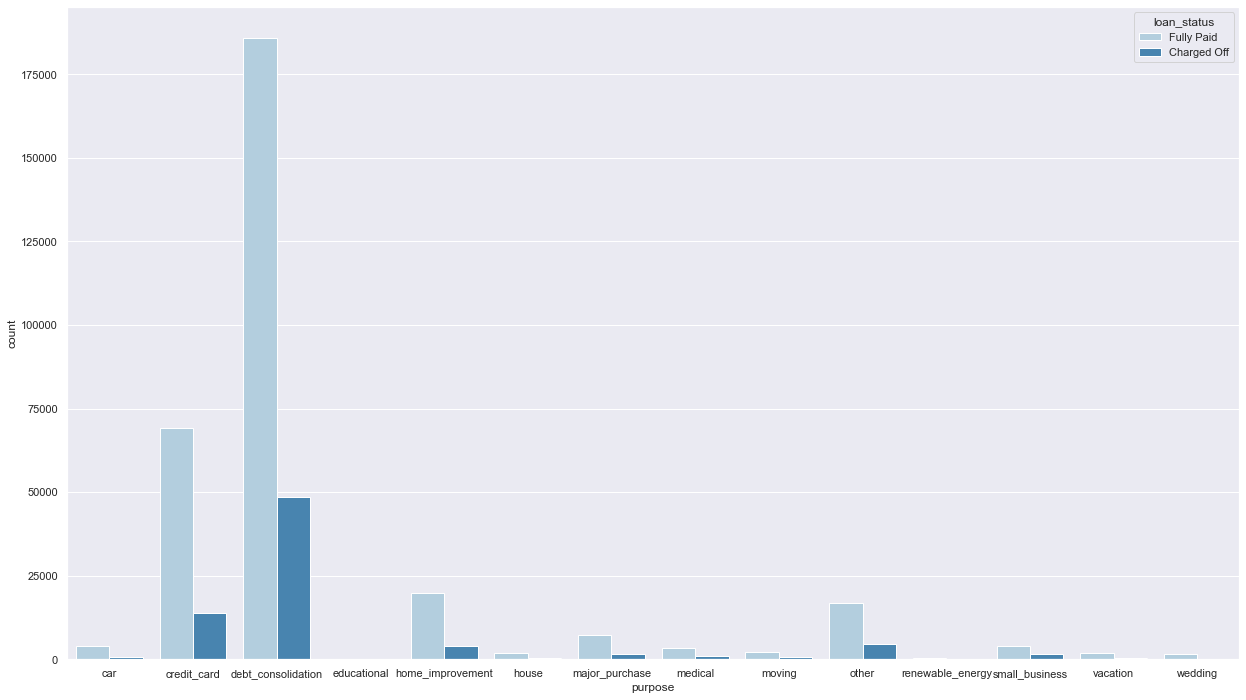

In [104]:
plt.figure(figsize=(21, 12))
purpose = sorted(Data.purpose.unique().tolist())
g = sns.countplot(x='purpose', data=Data, hue='loan_status', order=purpose,palette='Blues')

- Customers taken loan for <b>debt consolidation and to pay credit card bills</b> are likely to have charged off compared to other purposes.

<h3>Home Ownership</h3>

In [97]:
# Number of customers of each type of home ownership
Data['home_ownership'].value_counts()

MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: home_ownership, dtype: int64

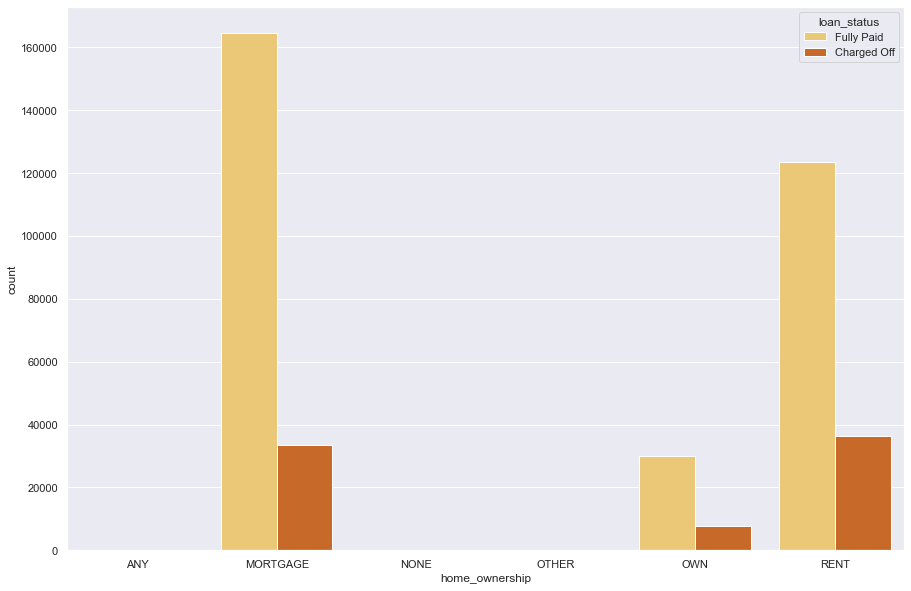

In [105]:
plt.figure(figsize=(15, 10))
ownership = sorted(Data.home_ownership.unique().tolist())
g = sns.countplot(x='home_ownership', data=Data, hue='loan_status', order=ownership,palette='YlOrBr')

- Customers with home ownership having <b> mortgage and rent </b>are charged off more compared to others.  

<h3>Verification Status</h3>

In [123]:
# Number of customers of each type of home ownership
Data['verification_status'].value_counts()

Verified           139563
Source Verified    131385
Not Verified       125082
Name: verification_status, dtype: int64

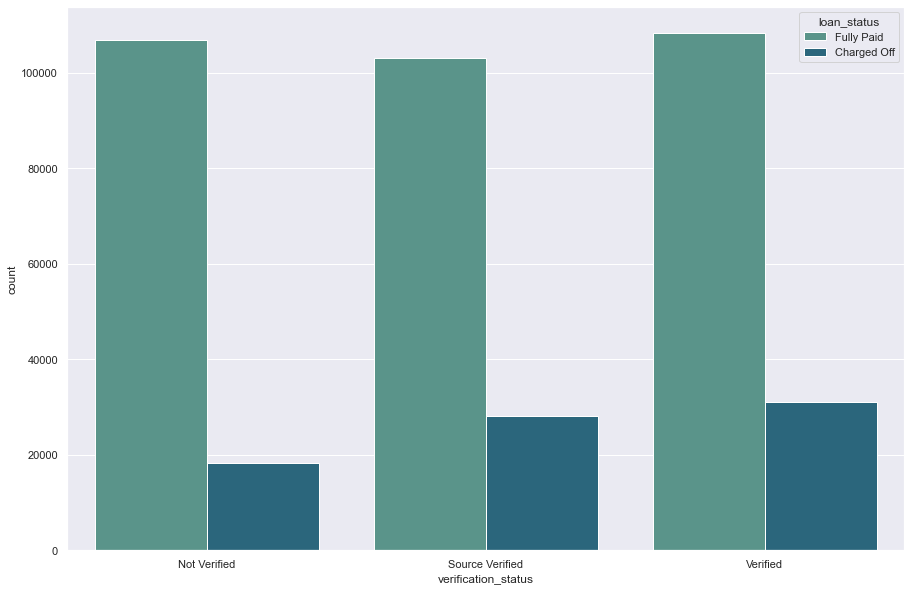

In [112]:
plt.figure(figsize=(15, 10))
verification = sorted(Data.verification_status.unique().tolist())
g = sns.countplot(x='verification_status', data=Data, hue='loan_status', order=verification,palette='crest')

- <b>Verification</b> status has almost same fully paid to charged off ratio for each category.

<h3>Employment Title</h3>

In [120]:
# Number of customers of each employment title
Data['emp_title'].value_counts()[:10]

Teacher             4389
Manager             4250
Registered Nurse    1856
RN                  1846
Supervisor          1830
Sales               1638
Project Manager     1505
Owner               1410
Driver              1339
Office Manager      1218
Name: emp_title, dtype: int64

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


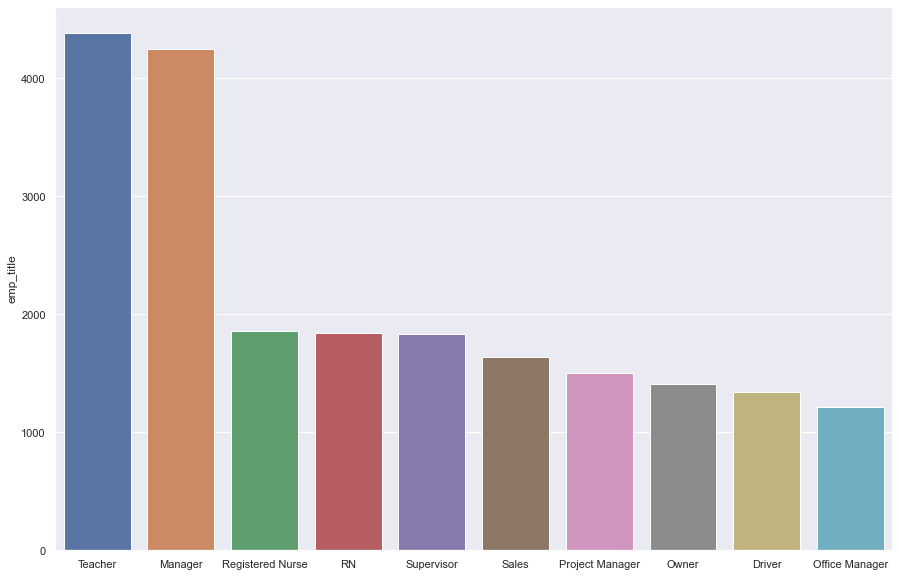

In [122]:
plt.figure(figsize=(15, 10))
ax = sns.barplot(Data.emp_title.value_counts()[:10].index, Data.emp_title.value_counts()[:10])

- Above is the most 10 professions of customers, who have take loan.

<h3>Employment Length</h3>

In [124]:
# Number of customers of each type of employemnt length
Data['emp_length'].value_counts()

10+ years    126041
2 years       35827
< 1 year      31725
3 years       31665
5 years       26495
1 year        25882
4 years       23952
6 years       20841
7 years       20819
8 years       19168
9 years       15314
Name: emp_length, dtype: int64

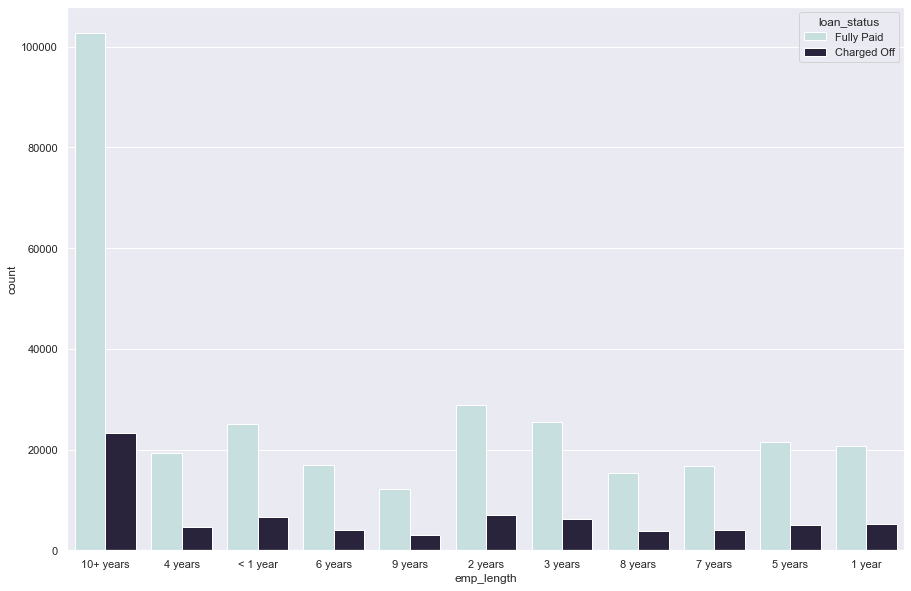

In [130]:
plt.figure(figsize=(15, 10))
g = sns.countplot(x='emp_length', data=Data, hue='loan_status',palette='ch:start=.2,rot=-.3')

- Each employment length category has equal ratio of fully paid to charged off.

<h3>Application Type</h3>

In [132]:
# Number of customers of each type of application
Data['application_type'].value_counts()

INDIVIDUAL    395319
JOINT            425
DIRECT_PAY       286
Name: application_type, dtype: int64

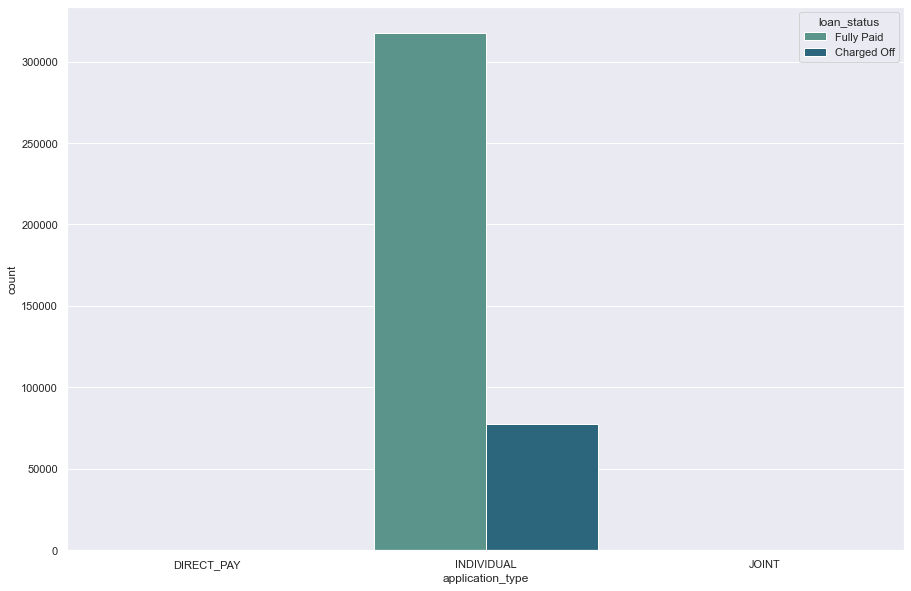

In [133]:
plt.figure(figsize=(15, 10))
app_type = sorted(Data.application_type.unique().tolist())
g = sns.countplot(x='application_type', data=Data, hue='loan_status', order=app_type,palette='crest')

- Most of the customers are indvidual applicant.

<h3>Loan Amount, Interest rate, Installment, DTI, Annual Income, Revolving balance, revolving utilization, Total accounts, Open accounts, Mortgage account</h3>

<Figure size 1080x720 with 0 Axes>

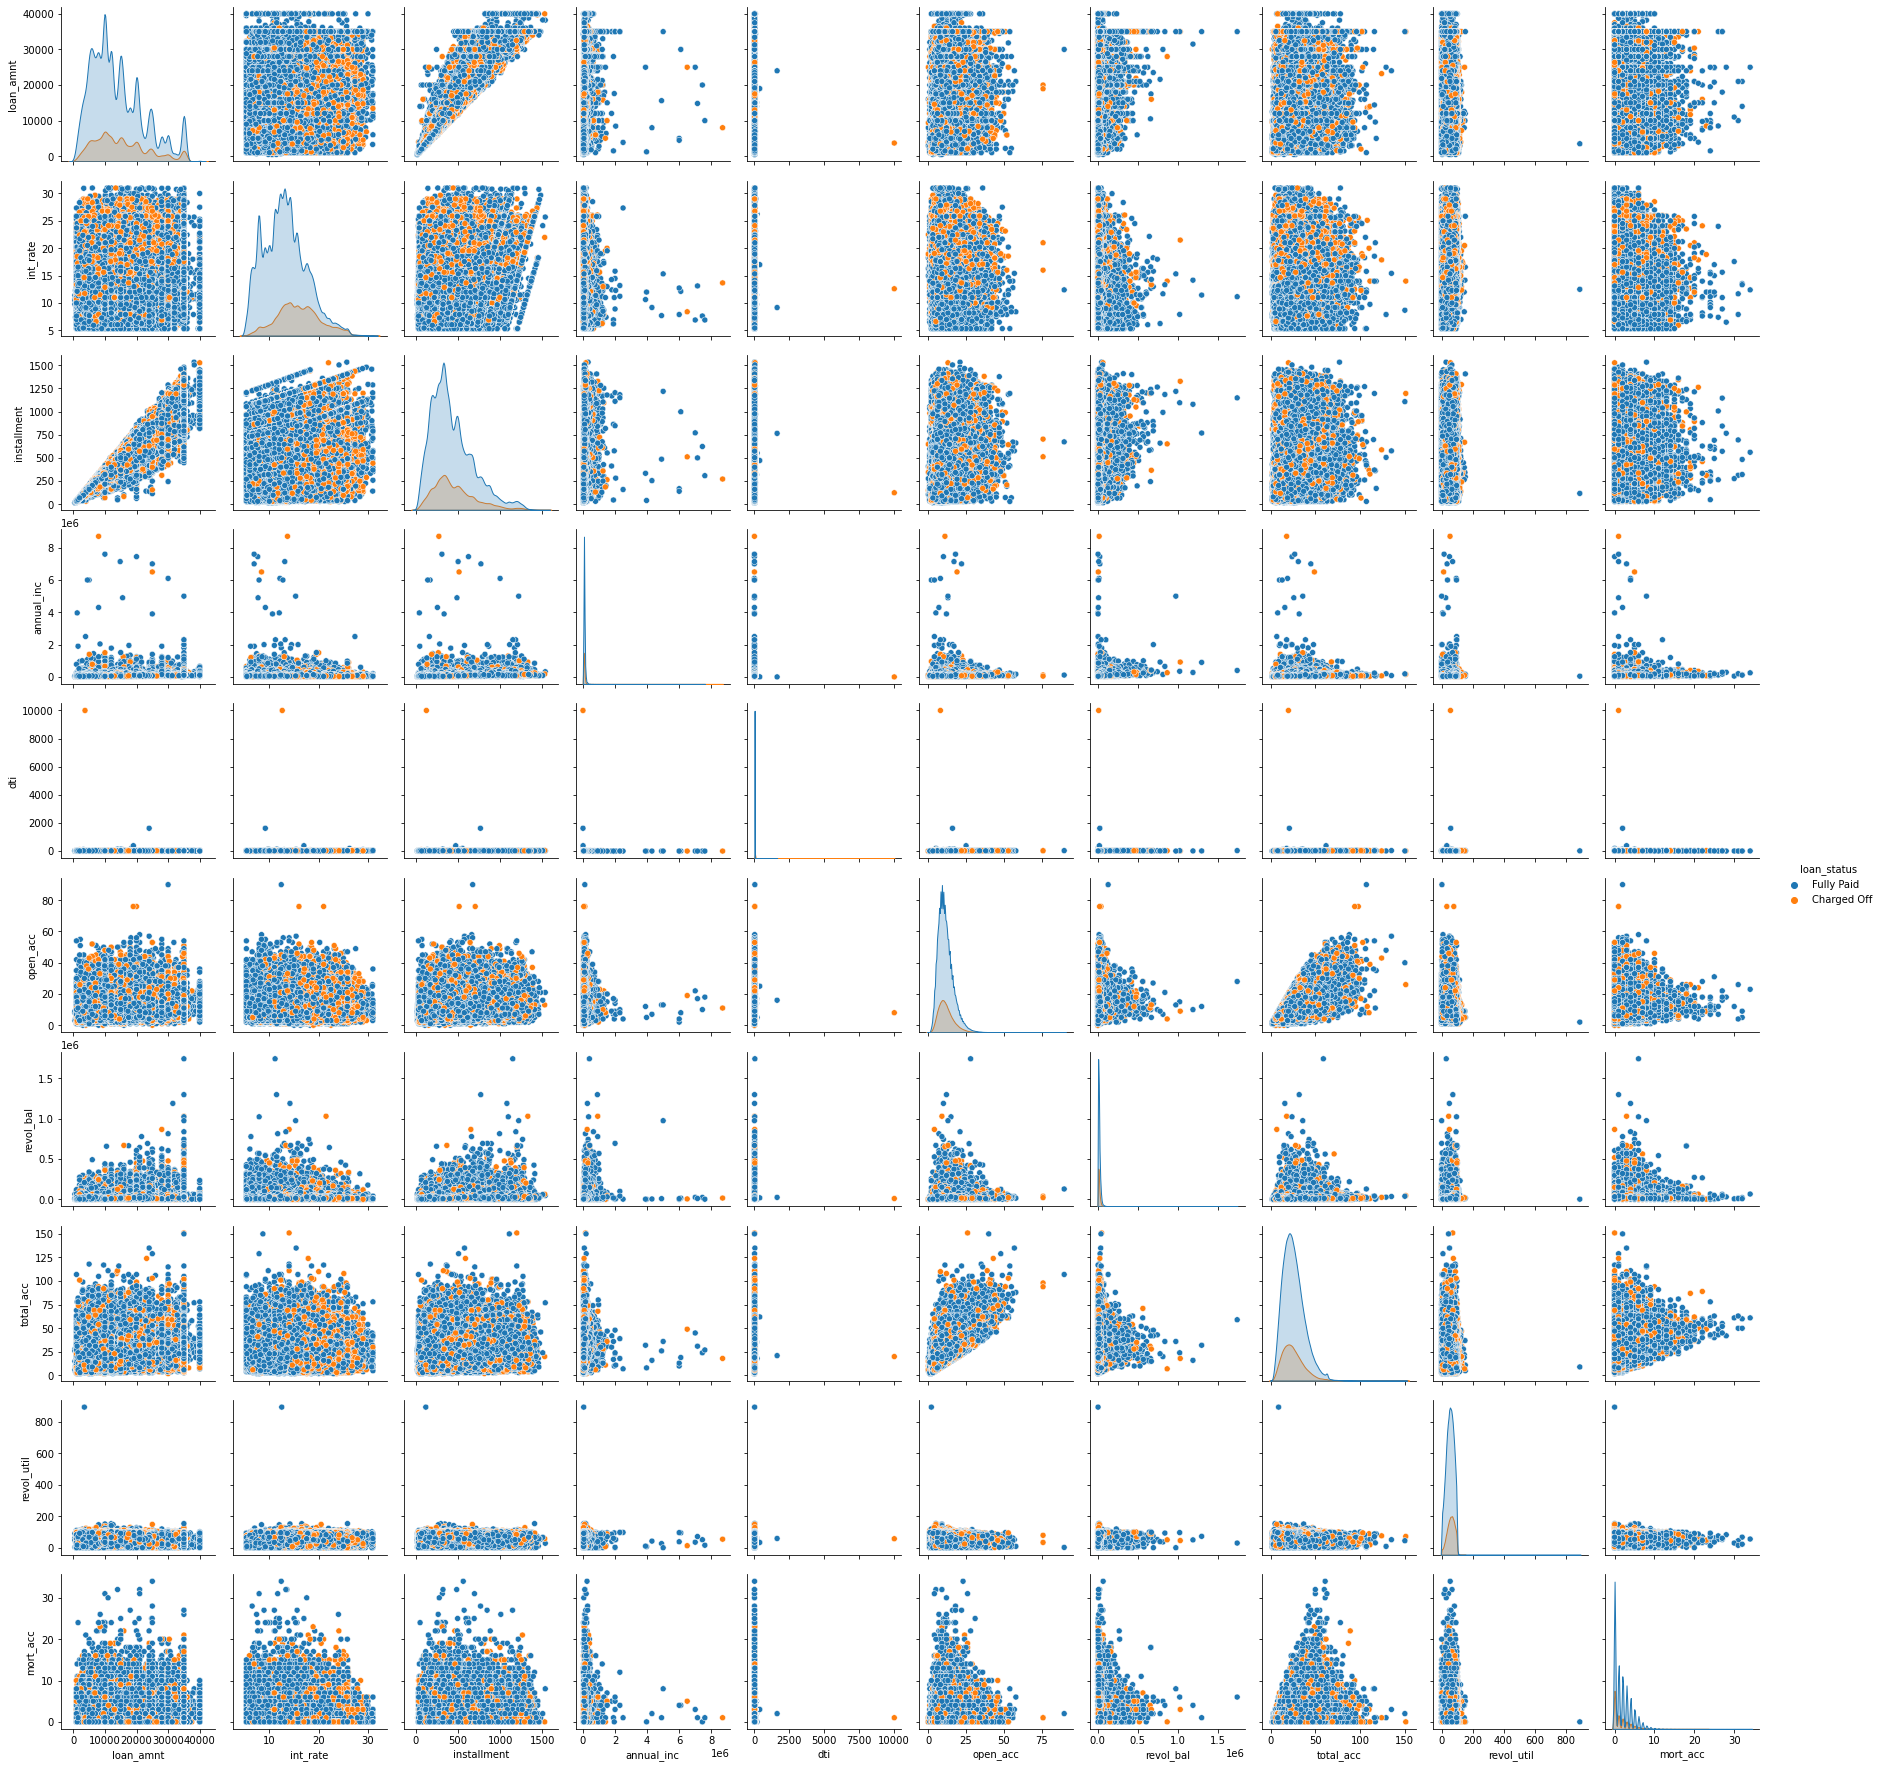

In [9]:
# Numerical features
df = Data[['loan_amnt','int_rate','installment','annual_inc','dti','open_acc','revol_bal','total_acc','revol_util','mort_acc','loan_status']]
plt.figure(figsize=(15, 10))
sns.pairplot(df, hue ='loan_status')

-  Customers with small installments and high interest are likely to get charged off.

<h3>DTI</h3>

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


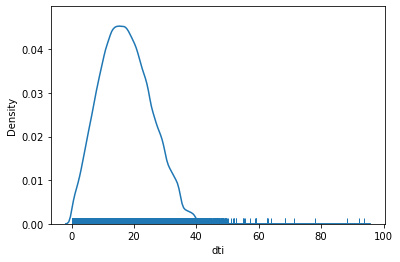

In [20]:
ax = sns.distplot(Data['dti'][Data['dti']<100], rug=True, hist=False)

<h3>Public records, public record bankruptcies and initial status</h3>

<AxesSubplot:xlabel='initial_list_status', ylabel='count'>

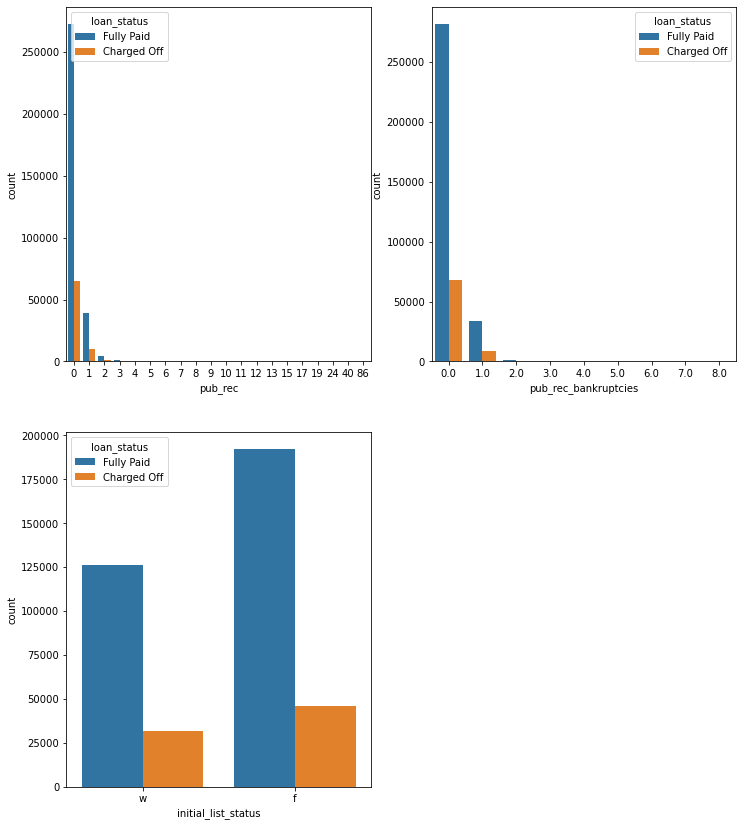

In [13]:
plt.figure(figsize=(12, 30))

plt.subplot(4, 2, 1)
sns.countplot(x='pub_rec', data=Data, hue='loan_status')

plt.subplot(4, 2, 2)
sns.countplot(x='pub_rec_bankruptcies', data=Data, hue='loan_status')

plt.subplot(4, 2, 3)
sns.countplot(x='initial_list_status', data=Data, hue='loan_status')

- Public records, Public bankruptcies records and initial list status have the almost equal proportion of charged off-fully paid customers in each category.

# Data Preprocessing
**Goals:** 
> - Remove or fill any missing data.
> - remove outliers
> - Remove unnecessary or repetitive features. 
> - Convert categorical string features to dummy variables.

<h3>Missing Values</h3>

In [4]:
# Missing values
for column in Data.columns:
    if Data[column].isna().sum() != 0:
        missing = Data[column].isna().sum()
        portion = (missing / Data.shape[0]) * 100
        print(f"'{column}': number of missing values '{missing}' ==> '{portion:.3f}%'")

'emp_title': number of missing values '22927' ==> '5.789%'
'emp_length': number of missing values '18301' ==> '4.621%'
'title': number of missing values '1755' ==> '0.443%'
'revol_util': number of missing values '276' ==> '0.070%'
'mort_acc': number of missing values '37795' ==> '9.543%'
'pub_rec_bankruptcies': number of missing values '535' ==> '0.135%'


- Mortgage account feature has the highest missing values.

<h4>emp_title</h4>

In [5]:
print('Number of unique values in emp_title feature: ' , Data['emp_title'].nunique())
Data.drop(['emp_title'],axis=1,inplace=True)

Number of unique values in emp_title feature:  173103


- emp_title has <b>173103</b> unique values and it will create a lot of dummy variables. It is better to drop it.

<h4>title</h4>

In [6]:
Data.drop('title', axis=1, inplace=True)

- We will drop title column title, as purpose column provides the same information.

<h4>emp_length</h4>

In [7]:
Data.emp_length.unique()

array(['10+ years', '4 years', '< 1 year', '6 years', '9 years',
       '2 years', '3 years', '8 years', '7 years', '5 years', '1 year',
       nan], dtype=object)

In [8]:
for year in Data.emp_length.unique():
    print(f"{year} years in this position:")
    print(f"{Data[Data.emp_length == year].loan_status.value_counts(normalize=True)}")
    print('==========================================')

10+ years years in this position:
Fully Paid     0.815814
Charged Off    0.184186
Name: loan_status, dtype: float64
4 years years in this position:
Fully Paid     0.807615
Charged Off    0.192385
Name: loan_status, dtype: float64
< 1 year years in this position:
Fully Paid     0.793128
Charged Off    0.206872
Name: loan_status, dtype: float64
6 years years in this position:
Fully Paid     0.810806
Charged Off    0.189194
Name: loan_status, dtype: float64
9 years years in this position:
Fully Paid     0.79953
Charged Off    0.20047
Name: loan_status, dtype: float64
2 years years in this position:
Fully Paid     0.806738
Charged Off    0.193262
Name: loan_status, dtype: float64
3 years years in this position:
Fully Paid     0.804769
Charged Off    0.195231
Name: loan_status, dtype: float64
8 years years in this position:
Fully Paid     0.80024
Charged Off    0.19976
Name: loan_status, dtype: float64
7 years years in this position:
Fully Paid     0.805226
Charged Off    0.194774
Name: loa

- Charge off rates are extremely similar across all employment lengths. So we are going to drop the emp_length column.

In [9]:
Data.drop('emp_length', axis=1, inplace=True)

<h4>Mortgage account</h4>

In [10]:
Data.drop('mort_acc', axis=1, inplace=True)

- Mortgage account has the most number of missing values, so better to drop it.

<h4> pub_rec_bankruptcies </h4>

In [11]:
Data.drop('pub_rec_bankruptcies', axis=1, inplace=True)

- public record bankruptcies is sub part of public records, so we can remove. It would be redudant feature.

<h4> issue date </h4>

In [12]:
Data.drop('issue_d', axis=1, inplace=True)

- This would be data leakage, we wouldn't know beforehand whether or not a loan would be issued when using our model, so in theory we wouldn't have an issue_date, drop this feature.


<h3>Outliers</h3>

<h4>revolving utilization</h4>

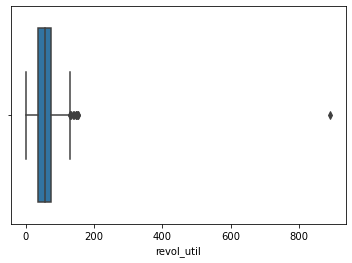

In [13]:
ax = sns.boxplot(x=Data['revol_util'])

- revolving utilization has some ouliers, which needs to be deleted. It can deviate the results.

In [14]:
Data = Data[Data['revol_util']<129]

<h4>DTI</h4>

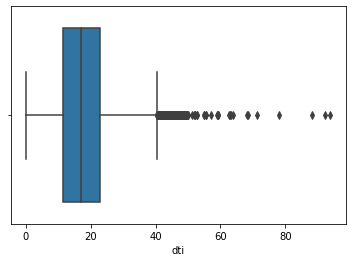

In [15]:
ax = sns.boxplot(x=Data['dti'][Data['dti']<100])

In [16]:
Data[['dti','loan_status']][Data['dti']>40]

,dti,loan_status
885,43.69,Charged Off
1291,40.81,Fully Paid
3169,42.54,Charged Off
4132,43.24,Charged Off
4413,51.20,Fully Paid
...,...,...
392526,42.49,Charged Off
392548,40.56,Charged Off
393545,47.09,Fully Paid
394511,49.38,Fully Paid


- Debt to income ratio has outliers, but are important as many customers with dti greater than 40 have been charged off. It can be helpful feature.

<h4>Annual Income</h4>

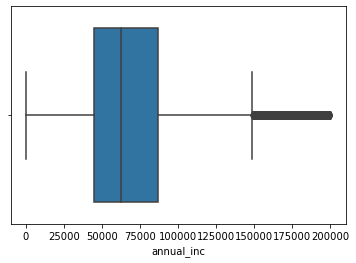

In [30]:
ax = sns.boxplot(x=Data['annual_inc'][Data['annual_inc']<200000])

In [33]:
df_ai = Data[['annual_inc','loan_status']][Data['annual_inc']>150000]

In [35]:
df_ai['loan_status'].value_counts()

Fully Paid     15752
Charged Off     2548
Name: loan_status, dtype: int64

- Annual income has outliers, but are important as many customers with income greater than 150000 $ have been charged off. It can be helpful feature.

<h4>Revovling Balance</h4>

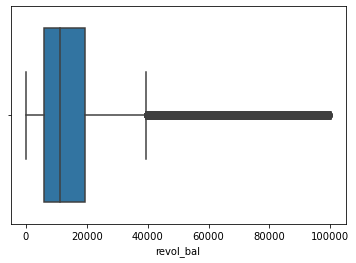

In [37]:
ax = sns.boxplot(x=Data['revol_bal'][Data['revol_bal']<100000])

In [38]:
df_rb = Data[['revol_bal','loan_status']][Data['revol_bal']>40000]

In [40]:
df_rb['loan_status'].value_counts()

Fully Paid     17476
Charged Off     3780
Name: loan_status, dtype: int64

- Revolving balance has outliers, but are important as many customers with revolving balance more than 40000 $ have been charged off. It can be helpful feature.

<h3> Feature engineering</h3>

<h4>Address</h4>

We are going to feature engineer a zip code column from the address in the data set. Create a column called 'zip_code' that extracts the zip code from the address column.

In [17]:
Data.address.head()

0       0174 Michelle Gateway\r\nMendozaberg, OK 22690
1    1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113
2    87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113
3              823 Reid Ford\r\nDelacruzside, MA 00813
4               679 Luna Roads\r\nGreggshire, VA 11650
Name: address, dtype: object

In [18]:
Data['zip_code'] = Data.address.apply(lambda x: x[-5:])

In [19]:
Data.drop('address', axis=1, inplace=True)

- Address column dropped.

<h4>earliest credit line</h4>

In [71]:
Data['earliest_cr_line']

0         Jun-90
1         Jul-04
2         Aug-07
3         Sep-06
4         Mar-99
           ...  
396025    Nov-04
396026    Feb-06
396027    Mar-97
396028    Nov-90
396029    Sep-98
Name: earliest_cr_line, Length: 395742, dtype: object

In [20]:
Data['earliest_cr_line'] = pd.to_datetime(Data['earliest_cr_line'],format='%b-%y')

In [21]:
Data['earliest_cr_line']

0        1990-06-01
1        2004-07-01
2        2007-08-01
3        2006-09-01
4        1999-03-01
            ...    
396025   2004-11-01
396026   2006-02-01
396027   1997-03-01
396028   1990-11-01
396029   1998-09-01
Name: earliest_cr_line, Length: 395742, dtype: datetime64[ns]

In [22]:
Data['earliest_cr_line'] = Data.earliest_cr_line.dt.year

In [25]:
# Number of values in each category
Data.earliest_cr_line.value_counts()

2000    29346
2001    29060
1999    26471
2002    25879
2003    23648
        ...  
2051        3
2050        3
2053        2
2048        1
2044        1
Name: earliest_cr_line, Length: 65, dtype: int64

In [26]:
# Distinct years
Data.earliest_cr_line.nunique()

65

In [24]:
# Preparing CSV file of prepreocessed data
Data.to_csv('Preprocessed_data.csv')

In [2]:
Data = pd.read_csv('Preprocessed_data.csv')

<h3>One hot encoding </h3>

In [3]:
# Categorical Variables
print([column for column in Data.columns if Data[column].dtype == object])

['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'initial_list_status', 'application_type']


In [4]:
# One hot encoding
X = Data.copy()
X.drop('loan_status',axis=1,inplace=True)
X = pd.get_dummies(Data, columns=['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status', 'purpose', 'initial_list_status', 'application_type', 'zip_code'], drop_first=True)
y = Data['loan_status'].replace({"Fully Paid":0,"Charged Off":1})

- Shape of Data after one hot encoding

In [5]:
# Columns after encoding
X.drop(['Unnamed: 0','loan_status'],axis=1,inplace=True)
X.columns


Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti',
       'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'term_ 60 months', 'grade_B', 'grade_C', 'grade_D',
       'grade_E', 'grade_F', 'grade_G', 'sub_grade_A2', 'sub_grade_A3',
       'sub_grade_A4', 'sub_grade_A5', 'sub_grade_B1', 'sub_grade_B2',
       'sub_grade_B3', 'sub_grade_B4', 'sub_grade_B5', 'sub_grade_C1',
       'sub_grade_C2', 'sub_grade_C3', 'sub_grade_C4', 'sub_grade_C5',
       'sub_grade_D1', 'sub_grade_D2', 'sub_grade_D3', 'sub_grade_D4',
       'sub_grade_D5', 'sub_grade_E1', 'sub_grade_E2', 'sub_grade_E3',
       'sub_grade_E4', 'sub_grade_E5', 'sub_grade_F1', 'sub_grade_F2',
       'sub_grade_F3', 'sub_grade_F4', 'sub_grade_F5', 'sub_grade_G1',
       'sub_grade_G2', 'sub_grade_G3', 'sub_grade_G4', 'sub_grade_G5',
       'home_ownership_MORTGAGE', 'home_ownership_NONE',
       'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT',
       've

In [6]:
print("Number of rows: ",X.shape[0])
print("Number of columns: ",X.shape[1])

Number of rows:  395742
Number of columns:  84


<h3>Normalization</h3>

In [7]:
scaler = MinMaxScaler()
X_min = scaler.fit_transform(X)

In [8]:
# Scaled Values of train data
X_min

array([[0.24050633, 0.2384106 , 0.20649259, ..., 0.        , 0.        ,
        0.        ],
       [0.18987342, 0.25983638, 0.16445613, ..., 0.        , 0.        ,
        0.        ],
       [0.38227848, 0.20140242, 0.32343697, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.11392405, 0.18192443, 0.09569555, ..., 1.        , 0.        ,
        0.        ],
       [0.51898734, 0.38917024, 0.3208344 , ..., 0.        , 0.        ,
        0.        ],
       [0.03797468, 0.32294507, 0.03419581, ..., 0.        , 0.        ,
        0.        ]])

In [9]:
# Save the normalized data to dataframe and create csv file of it.
X = pd.DataFrame(X_min, columns = X.columns)
#X.to_csv('Normalized_X.csv')

<h3> Train-Test Split of Data </h3>

In [7]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

<h3>Feature Importance</h3>

In [114]:
rfc = RandomForestClassifier(random_state=0,n_estimators=1000)
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=1000, random_state=0)

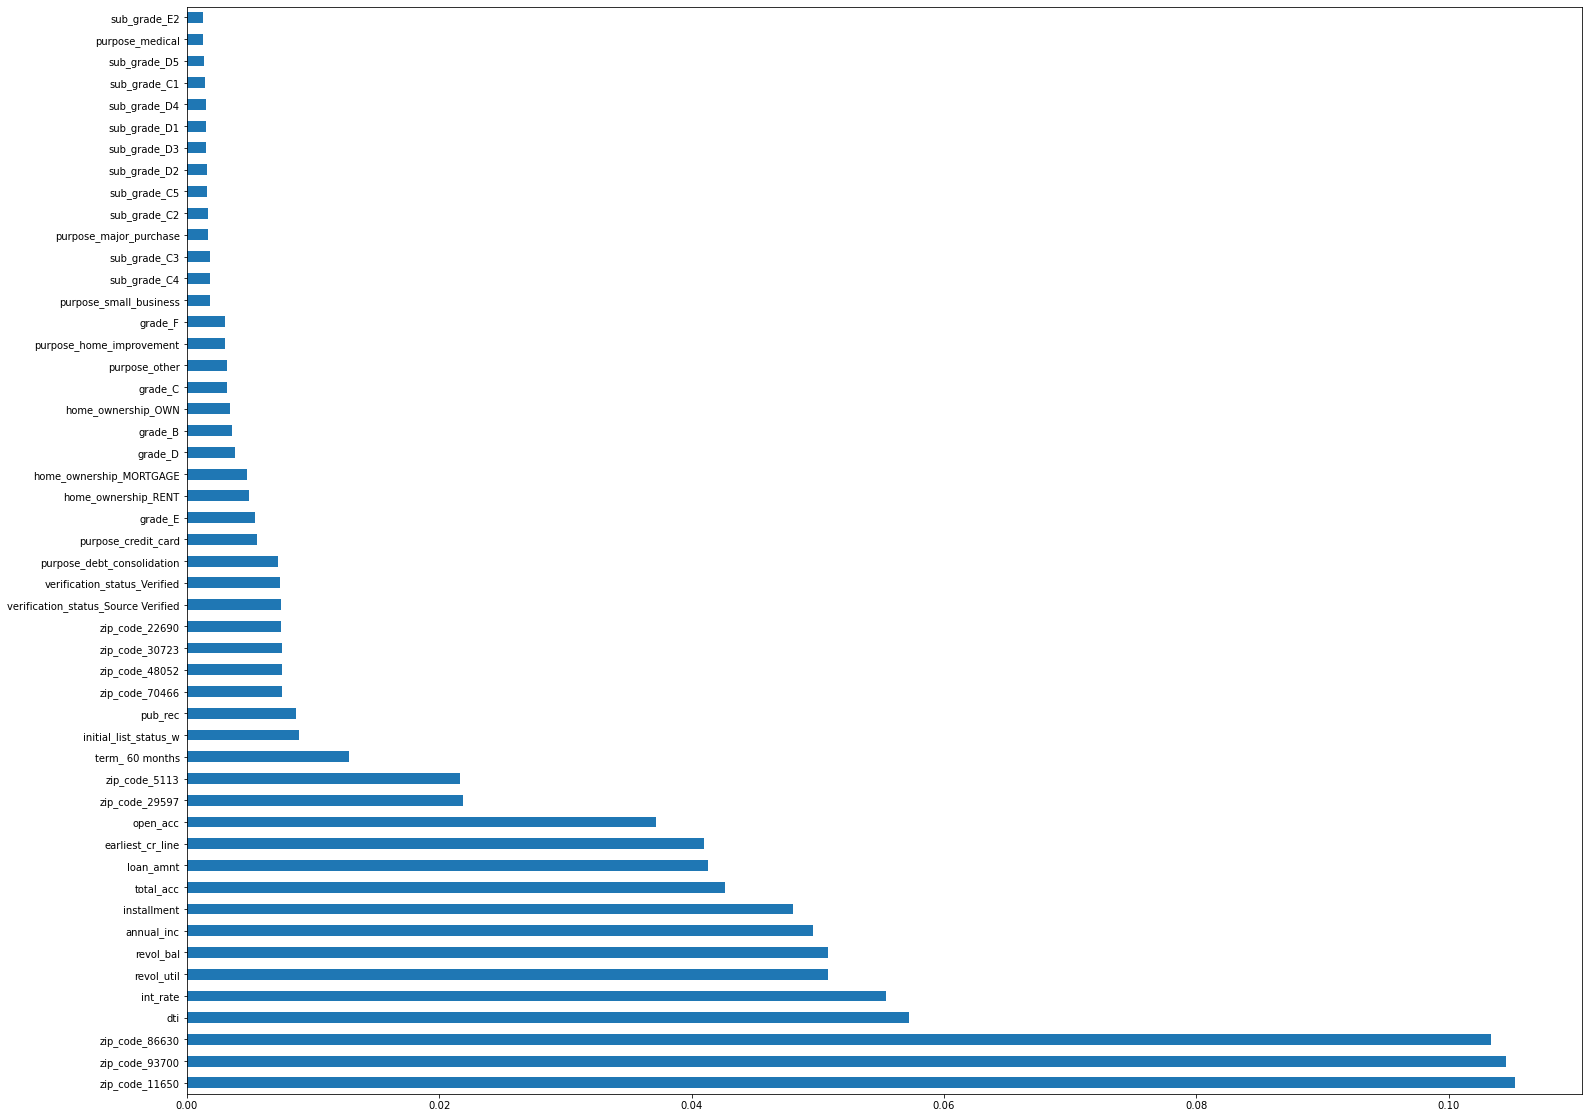

In [116]:
plt.figure(figsize=(25,20))
ranked_features=pd.Series(rfc.feature_importances_,index=X_train.columns)
ranked_features.nlargest(50).plot(kind='barh')
plt.show()

<b>Important features</b>

    - Zipcode_11650
    - Zipcode_93700
    - Zipcode_86630
    - DTI

<h3>Model Training</h3>

In [10]:
# Evaluation function
def print_score(true, pred, train=True):
    if train:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")
        
    elif train==False:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")

In [11]:
# Stratified Cross validation function


def Stratified_cross_validation(X_train,y_train,classifier):
    
    # list of metrics
    avg_train_accuracy = []
    avg_train_precision = []
    avg_train_recall = []
    avg_train_f1 = []
    avg_train_auc_roc = []
    
    avg_test_accuracy = []
    avg_test_precision = []
    avg_test_recall = []
    avg_test_f1 = []
    avg_test_auc_roc = []

    skf = StratifiedKFold(n_splits=5, random_state=None)
    skf.get_n_splits(X_train, y_train)
    
    # X is the feature set and y is the target
    for train_index, test_index in skf.split(X_train,y_train):
        #print("Train:", train_index, "Validation:", test_index) 
        X1_train, X1_test = X_train.iloc[train_index], X_train.iloc[test_index] 
        y1_train, y1_test = y_train.iloc[train_index], y_train.iloc[test_index]
        
        # Fit the model
        classifier.fit(X1_train,y1_train)
        
        # Train metrics
        train_pred = classifier.predict(X1_train)
        
        train_accuracy = accuracy_score(train_pred,y1_train)
        avg_train_accuracy.append(train_accuracy)
        
        train_recall = recall_score(train_pred,y1_train,average='weighted')
        avg_train_recall.append(train_recall)
        
        train_precision = precision_score(train_pred,y1_train,average='weighted')
        avg_train_precision.append(train_precision)
        
        train_f1 = f1_score(train_pred,y1_train,average='weighted')
        avg_train_f1.append(train_f1)
        
        train_auc_roc = roc_auc_score(y1_train,classifier.predict_proba(X1_train)[:, 1],average='weighted')
        avg_train_auc_roc.append(train_auc_roc)
        
        
        # Test metrics
        test_pred = classifier.predict(X1_test)
        
        test_accuracy = accuracy_score(test_pred,y1_test)
        avg_test_accuracy.append(test_accuracy)
        
        test_recall = recall_score(test_pred,y1_test,average='weighted')
        avg_test_recall.append(test_recall)
        
        test_precision = precision_score(test_pred,y1_test,average='weighted')
        avg_test_precision.append(test_precision)
        
        test_f1 = f1_score(test_pred,y1_test,average='weighted')
        avg_test_f1.append(test_f1)
        
        test_auc_roc = roc_auc_score(y1_test,classifier.predict_proba(X1_test)[:, 1],average='weighted')
        avg_test_auc_roc.append(test_auc_roc)
        print(classifier)
        
    return np.array(avg_train_accuracy).mean(),np.array(avg_train_recall).mean(), np.array(avg_train_precision).mean(),np.array(avg_train_f1).mean(),np.array(avg_train_auc_roc).mean(),np.array(avg_test_accuracy).mean(),np.array(avg_test_recall).mean(), np.array(avg_test_precision).mean(),np.array(avg_test_f1).mean(),np.array(avg_test_auc_roc).mean()
    

<h4>1. Logistic Regression</h4> 

In [37]:
# Stratified k fold cross validation for logistic regression
logistic = LogisticRegression()
avg_accuracy_train, avg_recall_train, avg_precision_train, avg_f1_train, avg_auc_roc_train, avg_accuracy_test, avg_recall_test, avg_precision_test, avg_f1_test, avg_auc_roc_test = Stratified_cross_validation(X,y,logistic)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

In [ ]:
print("================================================")
print("Train Result:\n================================================")
print("Accuracy Score: {:.2f} %".format(avg_accuracy_train))
print("Recall Score: {:.2f} %".format(avg_recall_train))
print("Precision Score: {:.2f} %".format(avg_precision_train))
print("F1 Score: {:.2f} %".format(avg_f1_train))
print("ROC AUC Score: {:.2f} %".format(avg_auc_roc_train))
print("================================================")
print("Validation Result:\n================================================")
print("Accuracy Score: {:.2f} %".format(avg_accuracy_test))
print("Recall Score: {:.2f} %".format(avg_recall_test))
print("Precision Score: {:.2f} %".format(avg_precision_test))
print("F1 Score: {:.2f} %".format(avg_f1_test))
print("ROC AUC Score: {:.2f} %".format(avg_auc_roc_test))

<h4>2. Support Vector Machine</h4>

In [ ]:
# Building a Support vector machine model
SVM = svm.SVC()
SVM = SVM.fit(X_train,y_train)

In [ ]:
# Evaluate Performance on Train data
y_train_pred =SVM.predict(X_train)
print_score(y_train, y_train_pred, train=True)

In [ ]:
# Predict on test data
# Evaluate Performance on Test data
y_test_pred = SVM.predict(X_test)
print_score(y_test, y_test_pred, train=False)

In [ ]:
SVM = svm.SVC()
avg_accuracy_train, avg_recall_train, avg_precision_train, avg_f1_train, avg_auc_roc_train, avg_accuracy_test, avg_recall_test, avg_precision_test, avg_f1_test, avg_auc_roc_test = Stratified_cross_validation(X_train,y_train,SVM)

In [ ]:
print("================================================")
print("Train Result:\n================================================")
print("Accuracy Score: {:.2f} %".format(avg_accuracy_train))
print("Recall Score: {:.2f} %".format(avg_recall_train))
print("Precision Score: {:.2f} %".format(avg_precision_train))
print("F1 Score: {:.2f} %".format(avg_f1_train))
print("ROC AUC Score: {:.2f} %".format(avg_auc_roc_train))
print("================================================")
print("Validation Result:\n================================================")
print("Accuracy Score: {:.2f} %".format(avg_accuracy_test))
print("Recall Score: {:.2f} %".format(avg_recall_test))
print("Precision Score: {:.2f} %".format(avg_precision_test))
print("F1 Score: {:.2f} %".format(avg_f1_test))
print("ROC AUC Score: {:.2f} %".format(avg_auc_roc_test))

<h4>3. Decision Tree</h4>

In [ ]:
# Building a Decision Tree model
Decisiontree = DecisionTreeClassifier()
Decisiontree = Decisiontree.fit(X_train,y_train)

In [ ]:
# Evaluate Performance on Train data
y_train_pred =Decisiontree.predict(X_train)
print_score(y_train, y_train_pred, train=True)

In [ ]:
# Predict on test data
# Evaluate Performance on Test data
y_test_pred = Decisiontree.predict(X_test)
print_score(y_test, y_test_pred, train=False)

In [51]:
Decisiontree = DecisionTreeClassifier(max_depth=20)
avg_accuracy_train, avg_recall_train, avg_precision_train, avg_f1_train, avg_auc_roc_train, avg_accuracy_test, avg_recall_test, avg_precision_test, avg_f1_test, avg_auc_roc_test = Stratified_cross_validation(X,y,Decisiontree)

In [ ]:
print("================================================")
print("Train Result:\n================================================")
print("Accuracy Score: {:.2f} %".format(avg_accuracy_train))
print("Recall Score: {:.2f} %".format(avg_recall_train))
print("Precision Score: {:.2f} %".format(avg_precision_train))
print("F1 Score: {:.2f} %".format(avg_f1_train))
print("ROC AUC Score: {:.2f} %".format(avg_auc_roc_train))
print("================================================")
print("Validation Result:\n================================================")
print("Accuracy Score: {:.2f} %".format(avg_accuracy_test))
print("Recall Score: {:.2f} %".format(avg_recall_test))
print("Precision Score: {:.2f} %".format(avg_precision_test))
print("F1 Score: {:.2f} %".format(avg_f1_test))
print("ROC AUC Score: {:.2f} %".format(avg_auc_roc_test))

<h4>4. Random Forest</h4>

In [22]:
# Building a random forest model
randomforest = RandomForestClassifier()
randomforest = randomforest.fit(X_train,y_train)

In [ ]:
# Evaluate Performance on Train data
y_train_pred =randomforest.predict(X_train)
print_score(y_train, y_train_pred, train=True)

In [ ]:
# Predict on test data
# Evaluate Performance on Test data
y_test_pred = randomforest.predict(X_test)
print_score(y_test, y_test_pred, train=False)

In [64]:
randomforest = RandomForestClassifier(n_estimators=90,max_depth=24)
avg_accuracy_train, avg_recall_train, avg_precision_train, avg_f1_train, avg_auc_roc_train, avg_accuracy_test, avg_recall_test, avg_precision_test, avg_f1_test, avg_auc_roc_test = Stratified_cross_validation(X,y,randomforest)

In [ ]:
print("================================================")
print("Train Result:\n================================================")
print("Accuracy Score: {:.2f} %".format(avg_accuracy_train))
print("Recall Score: {:.2f} %".format(avg_recall_train))
print("Precision Score: {:.2f} %".format(avg_precision_train))
print("F1 Score: {:.2f} %".format(avg_f1_train))
print("ROC AUC Score: {:.2f} %".format(avg_auc_roc_train))
print("================================================")
print("Validation Result:\n================================================")
print("Accuracy Score: {:.2f} %".format(avg_accuracy_test))
print("Recall Score: {:.2f} %".format(avg_recall_test))
print("Precision Score: {:.2f} %".format(avg_precision_test))
print("F1 Score: {:.2f} %".format(avg_f1_test))
print("ROC AUC Score: {:.2f} %".format(avg_auc_roc_test))

<h4>5. Ada Boost </h4>

In [25]:
# Building adaboost model
adaboost = AdaBoostClassifier()
adaboost = adaboost.fit(X_train,y_train)

In [ ]:
# Evaluate Performance on Train data
y_train_pred = adaboost.predict(X_train)
print_score(y_train, y_train_pred, train=True)

In [ ]:
# Predict on test data
# Evaluate Performance on Test data
y_test_pred = adaboost.predict(X_test)
print_score(y_test, y_test_pred, train=False)

In [69]:
adaboost = AdaBoostClassifier(n_estimators=200)
avg_accuracy_train, avg_recall_train, avg_precision_train, avg_f1_train, avg_auc_roc_train, avg_accuracy_test, avg_recall_test, avg_precision_test, avg_f1_test, avg_auc_roc_test = Stratified_cross_validation(X,y,adaboost)

In [ ]:
print("================================================")
print("Train Result:\n================================================")
print("Accuracy Score: {:.2f} %".format(avg_accuracy_train))
print("Recall Score: {:.2f} %".format(avg_recall_train))
print("Precision Score: {:.2f} %".format(avg_precision_train))
print("F1 Score: {:.2f} %".format(avg_f1_train))
print("ROC AUC Score: {:.2f} %".format(avg_auc_roc_train))
print("================================================")
print("Validation Result:\n================================================")
print("Accuracy Score: {:.2f} %".format(avg_accuracy_test))
print("Recall Score: {:.2f} %".format(avg_recall_test))
print("Precision Score: {:.2f} %".format(avg_precision_test))
print("F1 Score: {:.2f} %".format(avg_f1_test))
print("ROC AUC Score: {:.2f} %".format(avg_auc_roc_test))

<h4>6. Gradient Boosting</h4>

In [28]:
# Building a Gradient boosting model
gradientboosting = GradientBoostingClassifier()
gradientboosting = gradientboosting.fit(X_train,y_train)

In [ ]:
# Evaluate Performance on Train data
y_train_pred = gradientboosting.predict(X_train)
print_score(y_train, y_train_pred, train=True)

In [ ]:
# Predict on test data
# Evaluate Performance on Test data
y_test_pred = gradientboosting.predict(X_test)
print_score(y_test, y_test_pred, train=False)

In [ ]:
gradboost = GradientBoostingClassifier(n_estimators=200,max_depth=22)
avg_accuracy_train, avg_recall_train, avg_precision_train, avg_f1_train, avg_auc_roc_train, avg_accuracy_test, avg_recall_test, avg_precision_test, avg_f1_test, avg_auc_roc_test = Stratified_cross_validation(X,y,gradboost)

GradientBoostingClassifier(max_depth=22, n_estimators=200)
GradientBoostingClassifier(max_depth=22, n_estimators=200)


In [ ]:
print("================================================")
print("Train Result:\n================================================")
print("Accuracy Score: {:.2f} %".format(avg_accuracy_train))
print("Recall Score: {:.2f} %".format(avg_recall_train))
print("Precision Score: {:.2f} %".format(avg_precision_train))
print("F1 Score: {:.2f} %".format(avg_f1_train))
print("ROC AUC Score: {:.2f} %".format(avg_auc_roc_train))
print("================================================")
print("Validation Result:\n================================================")
print("Accuracy Score: {:.2f} %".format(avg_accuracy_test))
print("Recall Score: {:.2f} %".format(avg_recall_test))
print("Precision Score: {:.2f} %".format(avg_precision_test))
print("F1 Score: {:.2f} %".format(avg_f1_test))
print("ROC AUC Score: {:.2f} %".format(avg_auc_roc_test))

<h4>7. Xtreme Gradient Boosting</h4>

In [15]:
# Building a Xtreme Gradient boosting model
xgb = xgb.XGBClassifier(n_estimators = 1000)
xgb = xgb.fit(X_train,y_train)

C:\Users\Dell\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:06:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [ ]:
# Evaluate Performance on Train data
y_train_pred = xgb.predict(X_train)
print_score(y_train, y_train_pred, train=True)

In [ ]:
# Predict on test data
# Evaluate Performance on Test data
y_test_pred = xgb.predict(X_test)
print_score(y_test, y_test_pred, train=False)

In [ ]:
xgb = xgb.XGBClassifier(n_estimators = 1200)
avg_accuracy_train, avg_recall_train, avg_precision_train, avg_f1_train, avg_auc_roc_train, avg_accuracy_test, avg_recall_test, avg_precision_test, avg_f1_test, avg_auc_roc_test = Stratified_cross_validation(X,y,xgb)

In [ ]:
print("================================================")
print("Train Result:\n================================================")
print("Accuracy Score: {:.2f} %".format(avg_accuracy_train))
print("Recall Score: {:.2f} %".format(avg_recall_train))
print("Precision Score: {:.2f} %".format(avg_precision_train))
print("F1 Score: {:.2f} %".format(avg_f1_train))
print("ROC AUC Score: {:.2f} %".format(avg_auc_roc_train))
print("================================================")
print("Validation Result:\n================================================")
print("Accuracy Score: {:.2f} %".format(avg_accuracy_test))
print("Recall Score: {:.2f} %".format(avg_recall_test))
print("Precision Score: {:.2f} %".format(avg_precision_test))
print("F1 Score: {:.2f} %".format(avg_f1_test))
print("ROC AUC Score: {:.2f} %".format(avg_auc_roc_test))